In [1]:
import os
import sys
from Bio import SeqIO
import pandas as pd
import seaborn as sns

#finction to calculate and return gc content
def getGC(seq):
    return((sum([1.0 for nucl in seq if nucl in ['G', 'C']]) / len(seq)) * 100)


In [2]:
#Read all the transcripts
all_tx='../tx/transcripts.fa'
orphan_tx='../tx/orphan_transcripts_final.fa'


orphan_sequences = SeqIO.parse(open(orphan_tx),'fasta')
orphan_ids=[]
orphan_len=[]
orphan_gc=[]
for fasta in orphan_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    orphan_ids.append(name)


ids=[]
lens=[]
gc=[]
types=[]
all_sequences = SeqIO.parse(open(all_tx),'fasta')
for fasta in all_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    ids.append(name)
    lens.append(len(sequence))
    gc.append(getGC(sequence))
    if name not in orphan_ids:
        types.append('Conserved')
    else:
        types.append('Non-homologous')



In [3]:
#get everything in pandas df
nest=[ids,lens,gc,types]

df=pd.DataFrame(nest, ['Name', 'len', 'gc','type']).T
df["len"]=pd.to_numeric(df["len"])
df["gc"]=pd.to_numeric(df["gc"])

#get all file names
from os import listdir
from os.path import isfile, join
dirpath='../quant'
quantfiles = [f for f in listdir(dirpath) if isfile(join(dirpath, f))]
for f in quantfiles:
    thisName=f.split("_")[0]
    fname=join(dirpath,f)
    print("reading:"+fname)
    q1=pd.read_csv(fname,sep='\t')
    #print(q1)
    thisQ=q1.loc[:,['Name','TPM']]
    thisQ["TPM"]=pd.to_numeric(thisQ["TPM"])
    thisQ.rename(columns = {'TPM':thisName}, inplace = True) 
    #print(thisQ)
    #join with original df
    df=df.merge(thisQ,on='Name',how='left')


reading:../quant\SRR1168424_quant.sf
reading:../quant\SRR1573523_quant.sf
reading:../quant\SRR1620828_quant.sf
reading:../quant\SRR1620947_quant.sf
reading:../quant\SRR1620949_quant.sf
reading:../quant\SRR1621015_quant.sf
reading:../quant\SRR3053545_quant.sf
reading:../quant\SRR3084882_quant.sf
reading:../quant\SRR520999_quant.sf
reading:../quant\SRR999058_quant.sf


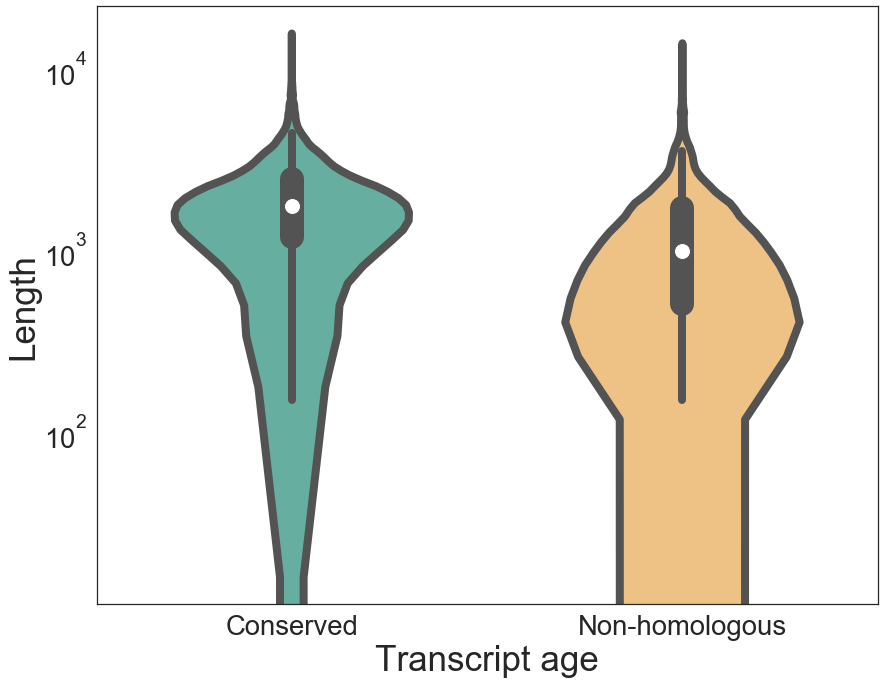

In [5]:
#compare length
sns.set(rc={'figure.figsize':(14,11)})
sns.set(font_scale=2.5,style="white")

ax = sns.violinplot(x="type", y="len", scale="width", width=0.6, linewidth=8, data=df, palette=["#5abaa7","#ffc374"])
ax.set_yscale("log")
ax.set_xlabel('Transcript age',fontsize=35)
ax.set_ylabel('Length',fontsize=35)
fig = ax.get_figure()
fig.savefig("length.png") 


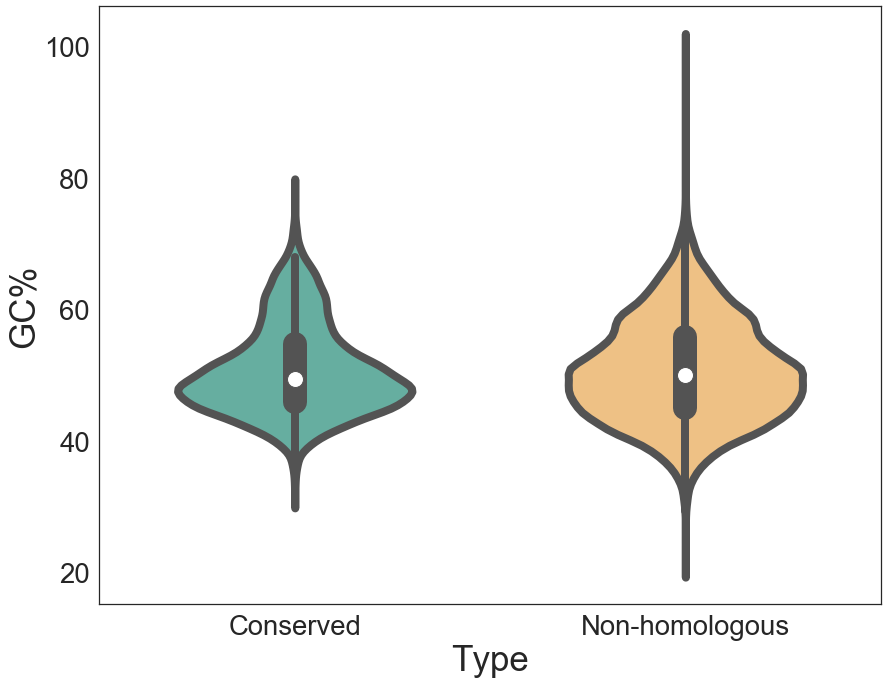

In [6]:
#compare gc
ax = sns.violinplot(x="type", y="gc", scale="width", width=0.6, linewidth=8, data=df, palette=["#5abaa7","#ffc374"])
ax.set_xlabel('Type',fontsize=35);
ax.set_ylabel('GC%',fontsize=35);
fig = ax.get_figure()
fig.savefig("gc.png") 

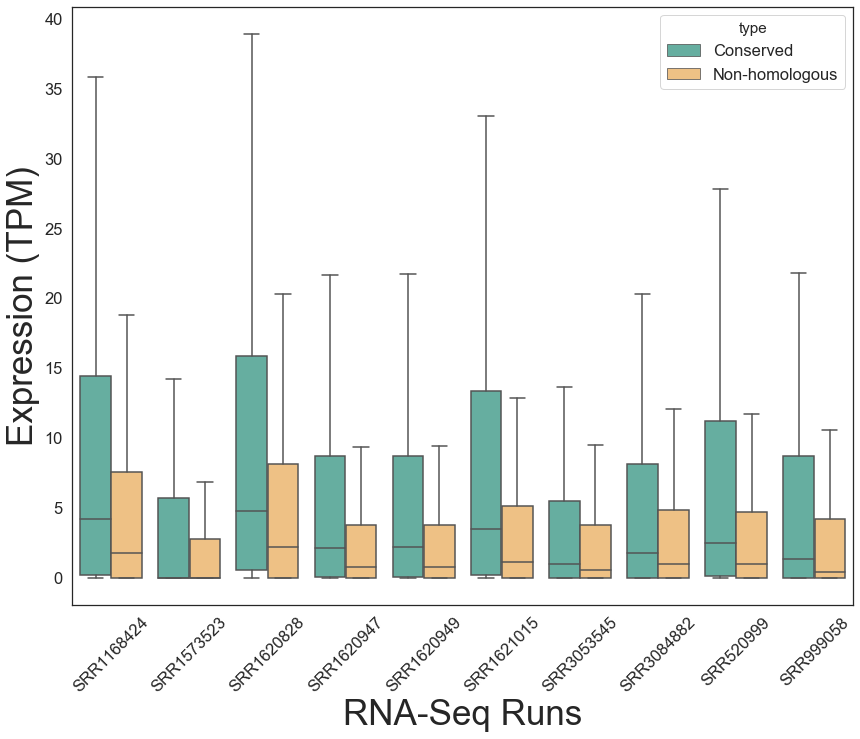

In [9]:
sns.set(rc={'figure.figsize':(14,11)})
sns.set(font_scale=1.5,style="white")
data=pd.melt(df.loc[:, 'type':'SRR999058' ],'type')
import matplotlib.pylab as plt
ax=sns.boxplot(x="variable", y="value",hue="type", data=data, showfliers=False, palette=["#5abaa7","#ffc374"])
ax.set_xlabel('RNA-Seq Runs',fontsize=35)
ax.set_ylabel('Expression (TPM)',fontsize=35)
plt.xticks(rotation=45)
fig = ax.get_figure()
fig.savefig("express.png")